In [3]:
import numpy as np
from bound_rewards_l import *
from lava_problem import main as lava_problem
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import cvxpy as cvx

In [4]:
# Setups for lava problem
p_correct_vals = np.linspace(0.01, 0.99, 20) 
reward_xs = np.array([0.1]) 
reward_x = reward_xs[0]

# Function
def bounds(svec, p_correct = p_correct_vals[0]):
		nx, nu, ny, T, p0, px_x, py_x, R, R0_expected = lava_problem(['--p_correct', str(p_correct), '--reward_x', str(reward_x)])
		bound_f_inverse = compute_bound(l,n,svec, nx, nu, ny, T, p0, px_x, py_x, R, R0_expected) 
		return bound_f_inverse

# Constraint: from 0 to 2, each slope has to be larger
# So elements in the slope vector need to be in increasing order
def con(svec):
    out = []
    for i in range(len(svec)-1):
        out.append(svec[i+1]-svec[i])
    return out
def con1(svec):
    return l(0,n,svec)-1
cons = [{'type':'ineq','fun': con}]

# Print optimization progress
def callbackF(svec,status):
    print (svec,bounds(svec))

In [5]:
def minimize(p_correct,svec):
	res = optimize.minimize(bounds,svec,method = 'trust-constr', constraints = cons, callback = callbackF, args = (p_correct), options={'disp':True})
	return[res.x, res.fun]

In [9]:
n = 2
s0 = [0,0,0,0]

In [ ]:
from dask.distributed import Client, progress
client = Client(n_workers=2)
client

In [ ]:
tr = 20
opt_results = []
s0_guesses = [s0]
opt_results.append(minimize(p_correct_vals[0],s0)) # first iteration
s0_guesses.append(opt_results[0][0])

futures = []
for i in range(1,tr):
    future = client.submit(minimize,p_correct_vals[i],s0_guesses[-1])
    futures.append(future)



In [10]:
tr = 3
opt_results = []
s0_guesses = [s0]
opt_results.append(minimize(p_correct_vals[0],s0)) # first iteration
s0_guesses.append(opt_results[0][0])

for i in range(1,tr):
    opt_result = minimize(p_correct_vals[i],s0_guesses[-1])
    opt_results.append(opt_result)

[0. 0. 0. 0.] 4.32499575
[-0.29913747 -0.01123547  0.26543105  0.80752862] 4.11989550625632
[-0.29913749 -0.01123549  0.26543107  0.80752864] 4.119895501799658
[-0.3728275  -0.07752091  0.36179759  0.87921937] 4.105758481558939
[-0.44659301 -0.14387422  0.45826282  0.95098355] 4.095385449110601
[-0.44659301 -0.14387422  0.45826282  0.95098355] 4.095385449110601
[-0.48948454 -0.18245589  0.51435329  0.99271141] 4.090163509680615
[-0.51874172 -0.20877324  0.55261375  1.02117482] 4.087346534906614
[-0.54520439 -0.23257688  0.58721973  1.04691954] 4.085180865811853
[-0.5691838  -0.2541468   0.6185783   1.07024838] 4.083468780667979
[-0.59113921 -0.2738961   0.64729003  1.09160814] 4.082073738028841
[-0.61141825 -0.29213749  0.67380952  1.11133701] 4.0809095641288256
[-0.630287   -0.3091103   0.69848475  1.12969387] 4.079919244403706
[-0.64795197 -0.32500029  0.72158576  1.14687959] 4.079063540052736
[-0.66457594 -0.33995388  0.74332541  1.16305256] 4.078314523449381
[-0.68028917 -0.3540882

In [19]:
# bounds([-1.0130594 , -1.01305833,  0.73804023,  1.29017034], 0.6289473684210526)
bounds([-1,-1,1,1], 0.6289473684210526)

4.277136603596268

In [18]:
client.close()

In [25]:
minimize(0.6289473684210526,[-1.18994735, -1.03399307,  0.7820952,   1.47360323])

KeyboardInterrupt: 

In [27]:

bounds([-3.53,1.18,1.18,1.18],0.6289473684210526)

4.161923218256493

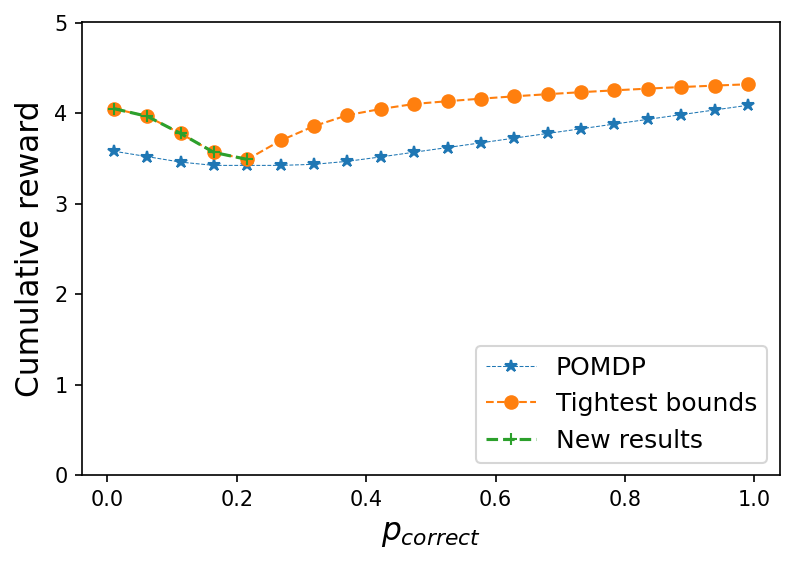

In [45]:
# Plot POMDP v picked tightest bounds
opt_data = np.load("results/lava_problem_optimal_results.npz")
p_correct_vals = opt_data['p_correct_vals']
opt_values = opt_data['opt_values']

# Plot
fig, ax = plt.subplots()
ax.plot(p_correct_vals, opt_values, '*--', label='POMDP', linewidth=0.5)

data = np.load("tightest_bounds.npz")
bounds = data['bounds']
ax.plot(p_correct_vals, bounds, 'o--', label='Tightest bounds', linewidth=1) 

ax.plot(p_correct_vals[0:5],[4.0531239449,3.9676793198,3.777793097,3.5682540424,3.4912805122],'+--',label='New results')

plt.xlabel('$p_{correct}$', fontsize=15)
plt.ylabel('Cumulative reward', fontsize=15)
plt.legend(fontsize=12, loc='lower right')
plt.ylim([0, 5.01])
plt.gcf().set_dpi(150)
plt.show() 

In [16]:

y=np.array(opt_results)
np.savez('y.npz',y)

/Users/dell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [17]:
data = np.load('y.npz')

In [19]:
tight_data = np.load("tightest_bounds.npz")

In [25]:
tight_data['bounds']

array([4.05312389, 3.96767919, 3.77779307, 3.56825402, 3.49128049,
       3.70081956, 3.86002083, 3.98079783, 4.04926083, 4.10458269,
       4.13508936, 4.16309059, 4.18891699, 4.21277768, 4.2348377 ,
       4.25523239, 4.27407692, 4.29147255, 4.30751088, 4.32227652])

In [33]:
[opt_results[j][0] for j in range(3)]

[array([-1.15008644, -1.15008483,  1.49069847,  1.85390358]),
 array([-2.21624679, -2.21624479,  2.73076187,  2.73081773]),
 array([-13.40324736,  -4.26651322,   6.08361453,  14.22698142])]